In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#No null values in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Checking for duplicate values in the dataset (Primary feature and all features).

In [6]:
df.duplicated().sum()

0

In [7]:
df['CustomerId'].duplicated().sum()

0

## Feature Engineering

In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
# Applied one-hot econder to the feature 'Geography'.
df=pd.get_dummies(df,columns=['Geography'])

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Applied label econder to the feature 'Gender'.
df['Gender']=le.fit_transform(df['Gender']) # Female = 0, Male=1

In [12]:
df.drop('RowNumber',axis=1,inplace=True)

In [13]:
# Applied Binning to the feature 'Age'. 
df['Age_bin'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['young', 'middle_aged', 'senior', 'elderly'])

In [14]:
df=pd.get_dummies(df,columns=['Age_bin'])

In [15]:
df

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_bin_young,Age_bin_middle_aged,Age_bin_senior,Age_bin_elderly
0,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False,False,True,False,False
1,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True,False,True,False,False
2,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False,False,True,False,False
3,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False,False,True,False,False
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True,False,False
9996,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True,False,False
9997,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False,False,True,False,False
9998,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True,False,False


In [16]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Age_bin_young', 'Age_bin_middle_aged',
       'Age_bin_senior', 'Age_bin_elderly'],
      dtype='object')

<Axes: xlabel='Balance', ylabel='Count'>

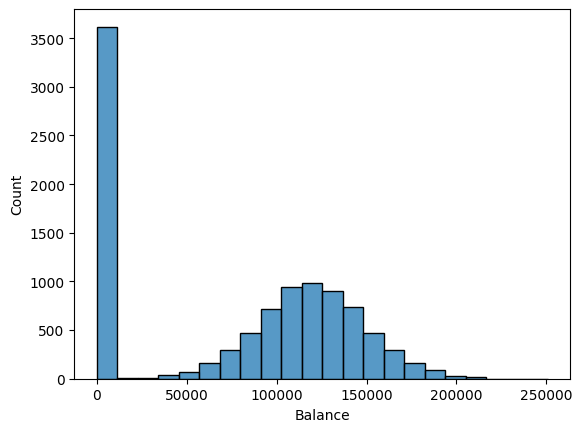

In [17]:
# Checking variance for feature 'Balance'.
sns.histplot(df['Balance'])

In [18]:
# Equate every instance of 'Balance' having value '0' to NULL. this way we can visualize the variance better and we can reassign the value '0' later.
df.loc[df['Balance']==0, 'Balance']=np.nan

<Axes: xlabel='Balance', ylabel='Count'>

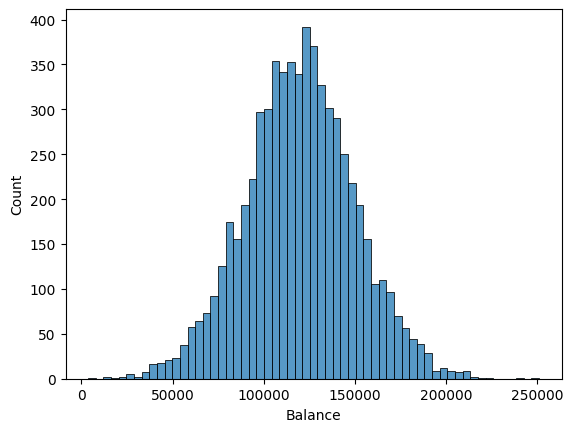

In [19]:
sns.histplot(df['Balance'])

In [20]:
# Apply binning to the feature 'Balance'. binning each value above 0 and incrementing by 50,000 each time other than the last one.
df['Balance_bin'] = pd.cut(df['Balance'], bins=[1, 49999, 99999, 149999, 199999,300000], labels=['1-49999', '50000-99999', '100000-149999', '150000-199999','200000>'])

In [21]:
# Reassign the value 0 to balance and add the category of '0' for all 0 balance
df['Balance']=df['Balance'].fillna(0)
df['Balance_bin'] = df['Balance_bin'].cat.add_categories(['0'])
df['Balance_bin']=df['Balance_bin'].fillna('0')

In [22]:
df

,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Age_bin_young,Age_bin_middle_aged,Age_bin_senior,Age_bin_elderly,Balance_bin
0,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False,False,True,False,False,0
1,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True,False,True,False,False,50000-99999
2,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False,False,True,False,False,150000-199999
3,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False,False,True,False,False,0
4,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True,False,True,False,False,100000-149999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False,False,True,False,False,0
9996,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False,False,True,False,False,50000-99999
9997,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False,False,True,False,False,0
9998,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False,False,True,False,False,50000-99999


In [23]:
# Apply One-hot encoder to feature 'Balance_bin'.
df=pd.get_dummies(df,columns=['Balance_bin'])

In [24]:
# Rearrange the dataframe.
df=df[['CustomerId', 'Surname', 'CreditScore', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender','Age', 'Age_bin_young',
       'Age_bin_middle_aged', 'Age_bin_senior', 'Age_bin_elderly', 'Tenure',
       'Balance', 'Balance_bin_1-49999',
       'Balance_bin_50000-99999', 'Balance_bin_100000-149999',
       'Balance_bin_150000-199999', 'Balance_bin_200000>', 'Balance_bin_0', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited']]

In [25]:
dfnumeric=df.drop('Surname',axis=1)
dfplot=dfnumeric.drop(['CustomerId','EstimatedSalary','Balance','CreditScore','Age','Exited'],axis=1)

## EDA

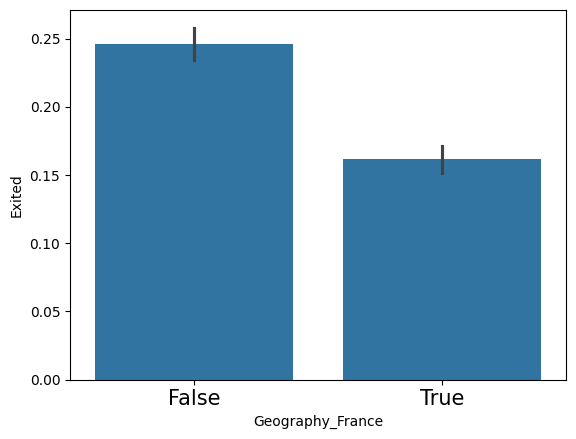

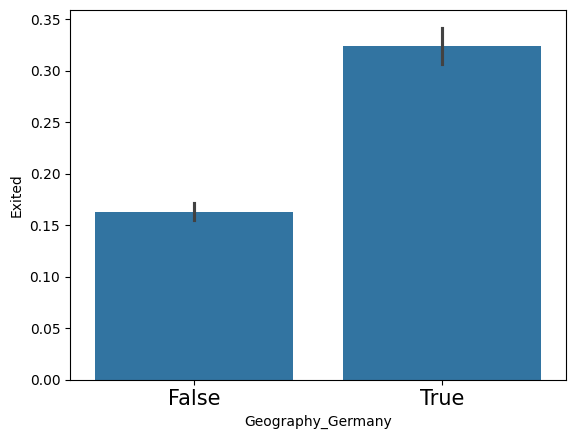

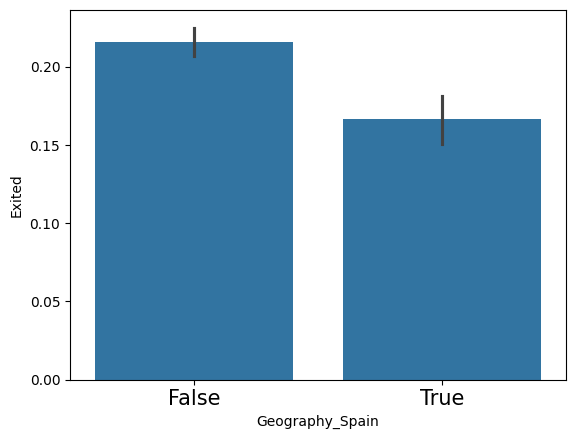

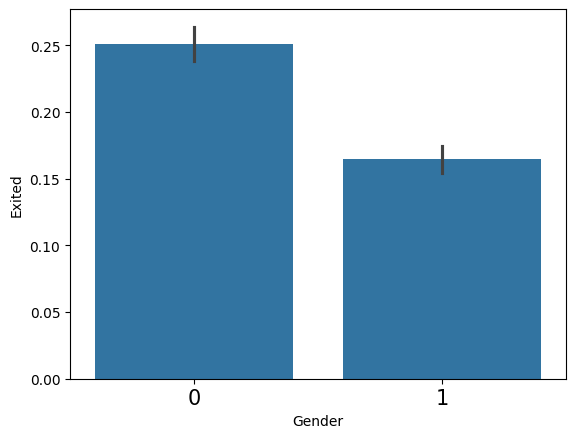

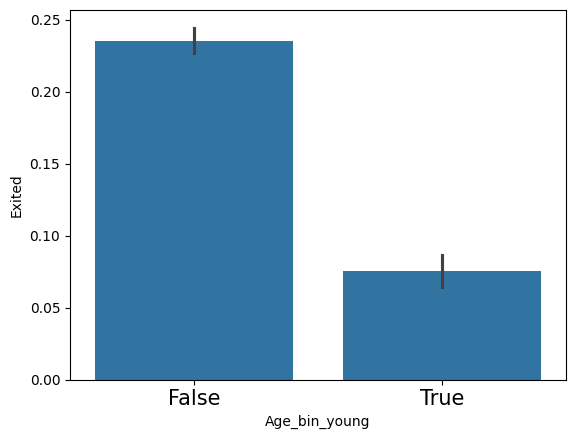

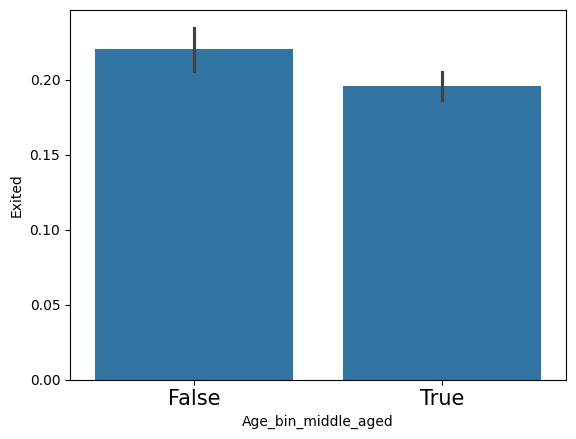

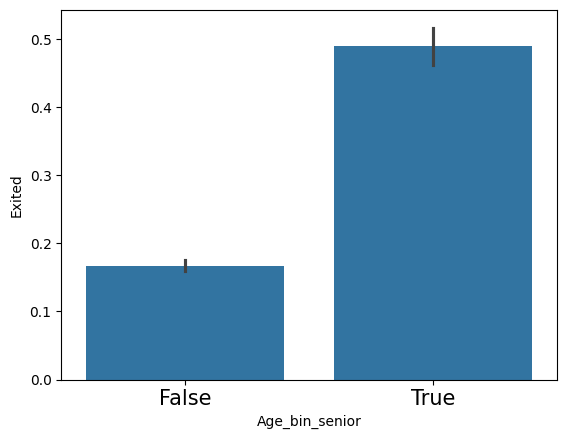

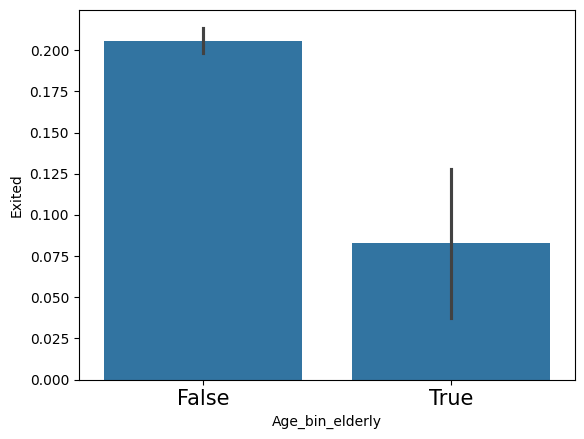

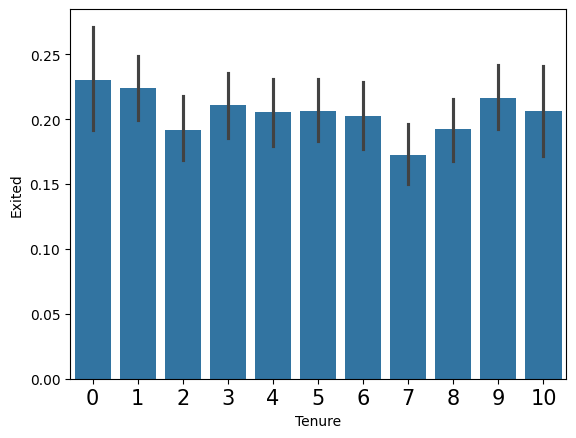

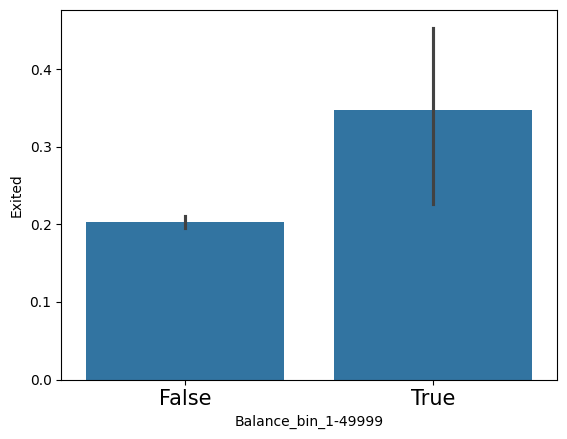

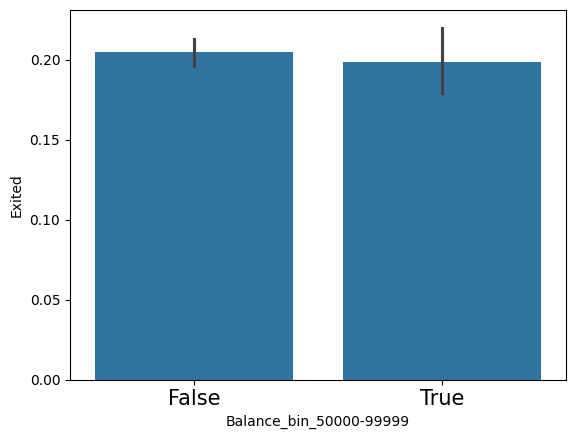

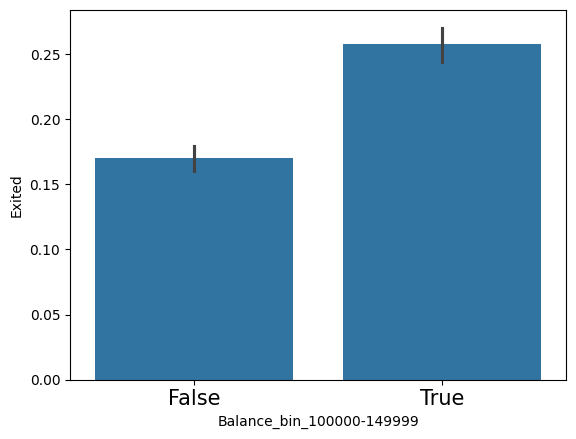

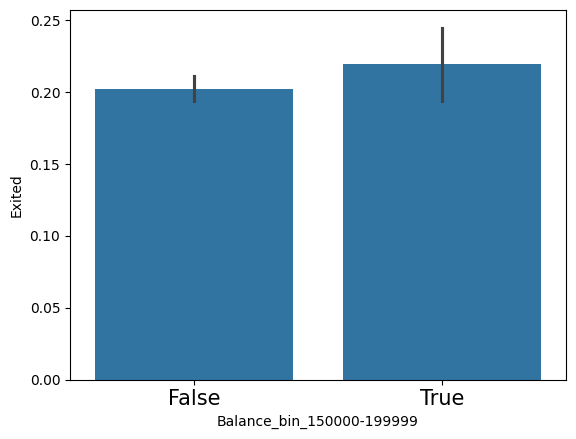

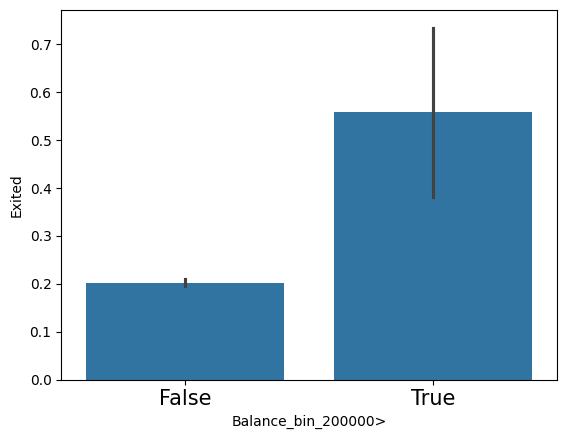

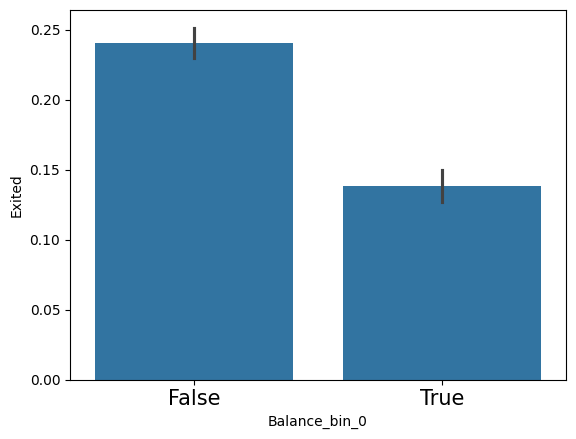

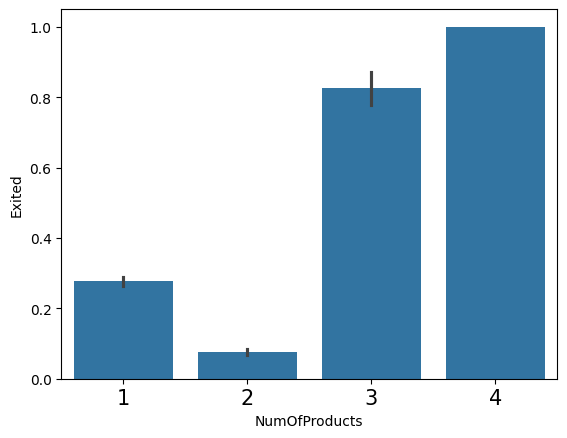

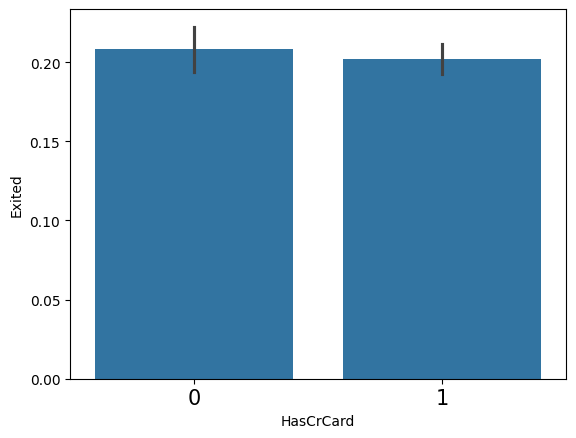

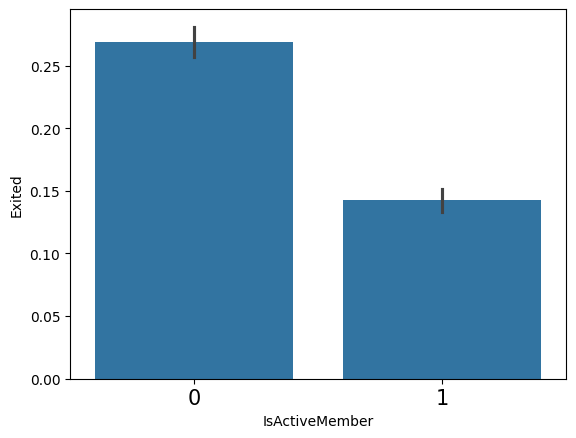

In [27]:
for i in dfplot:
    plt.figure()
    sns.barplot(x=df[i],y=df['Exited'])
    plt.xticks(fontsize=15)
    plt.plot

<Axes: xlabel='Exited', ylabel='count'>

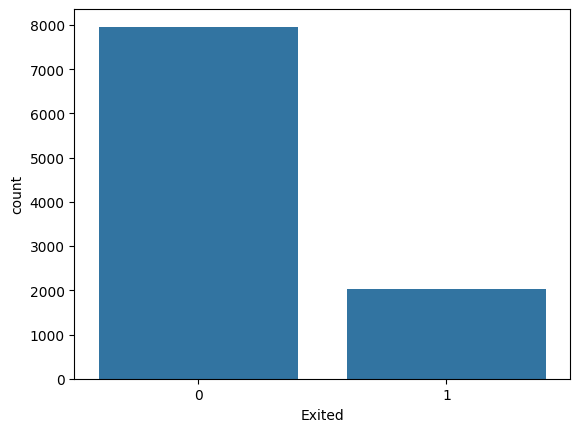

In [28]:
sns.countplot(x=df['Exited'])

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

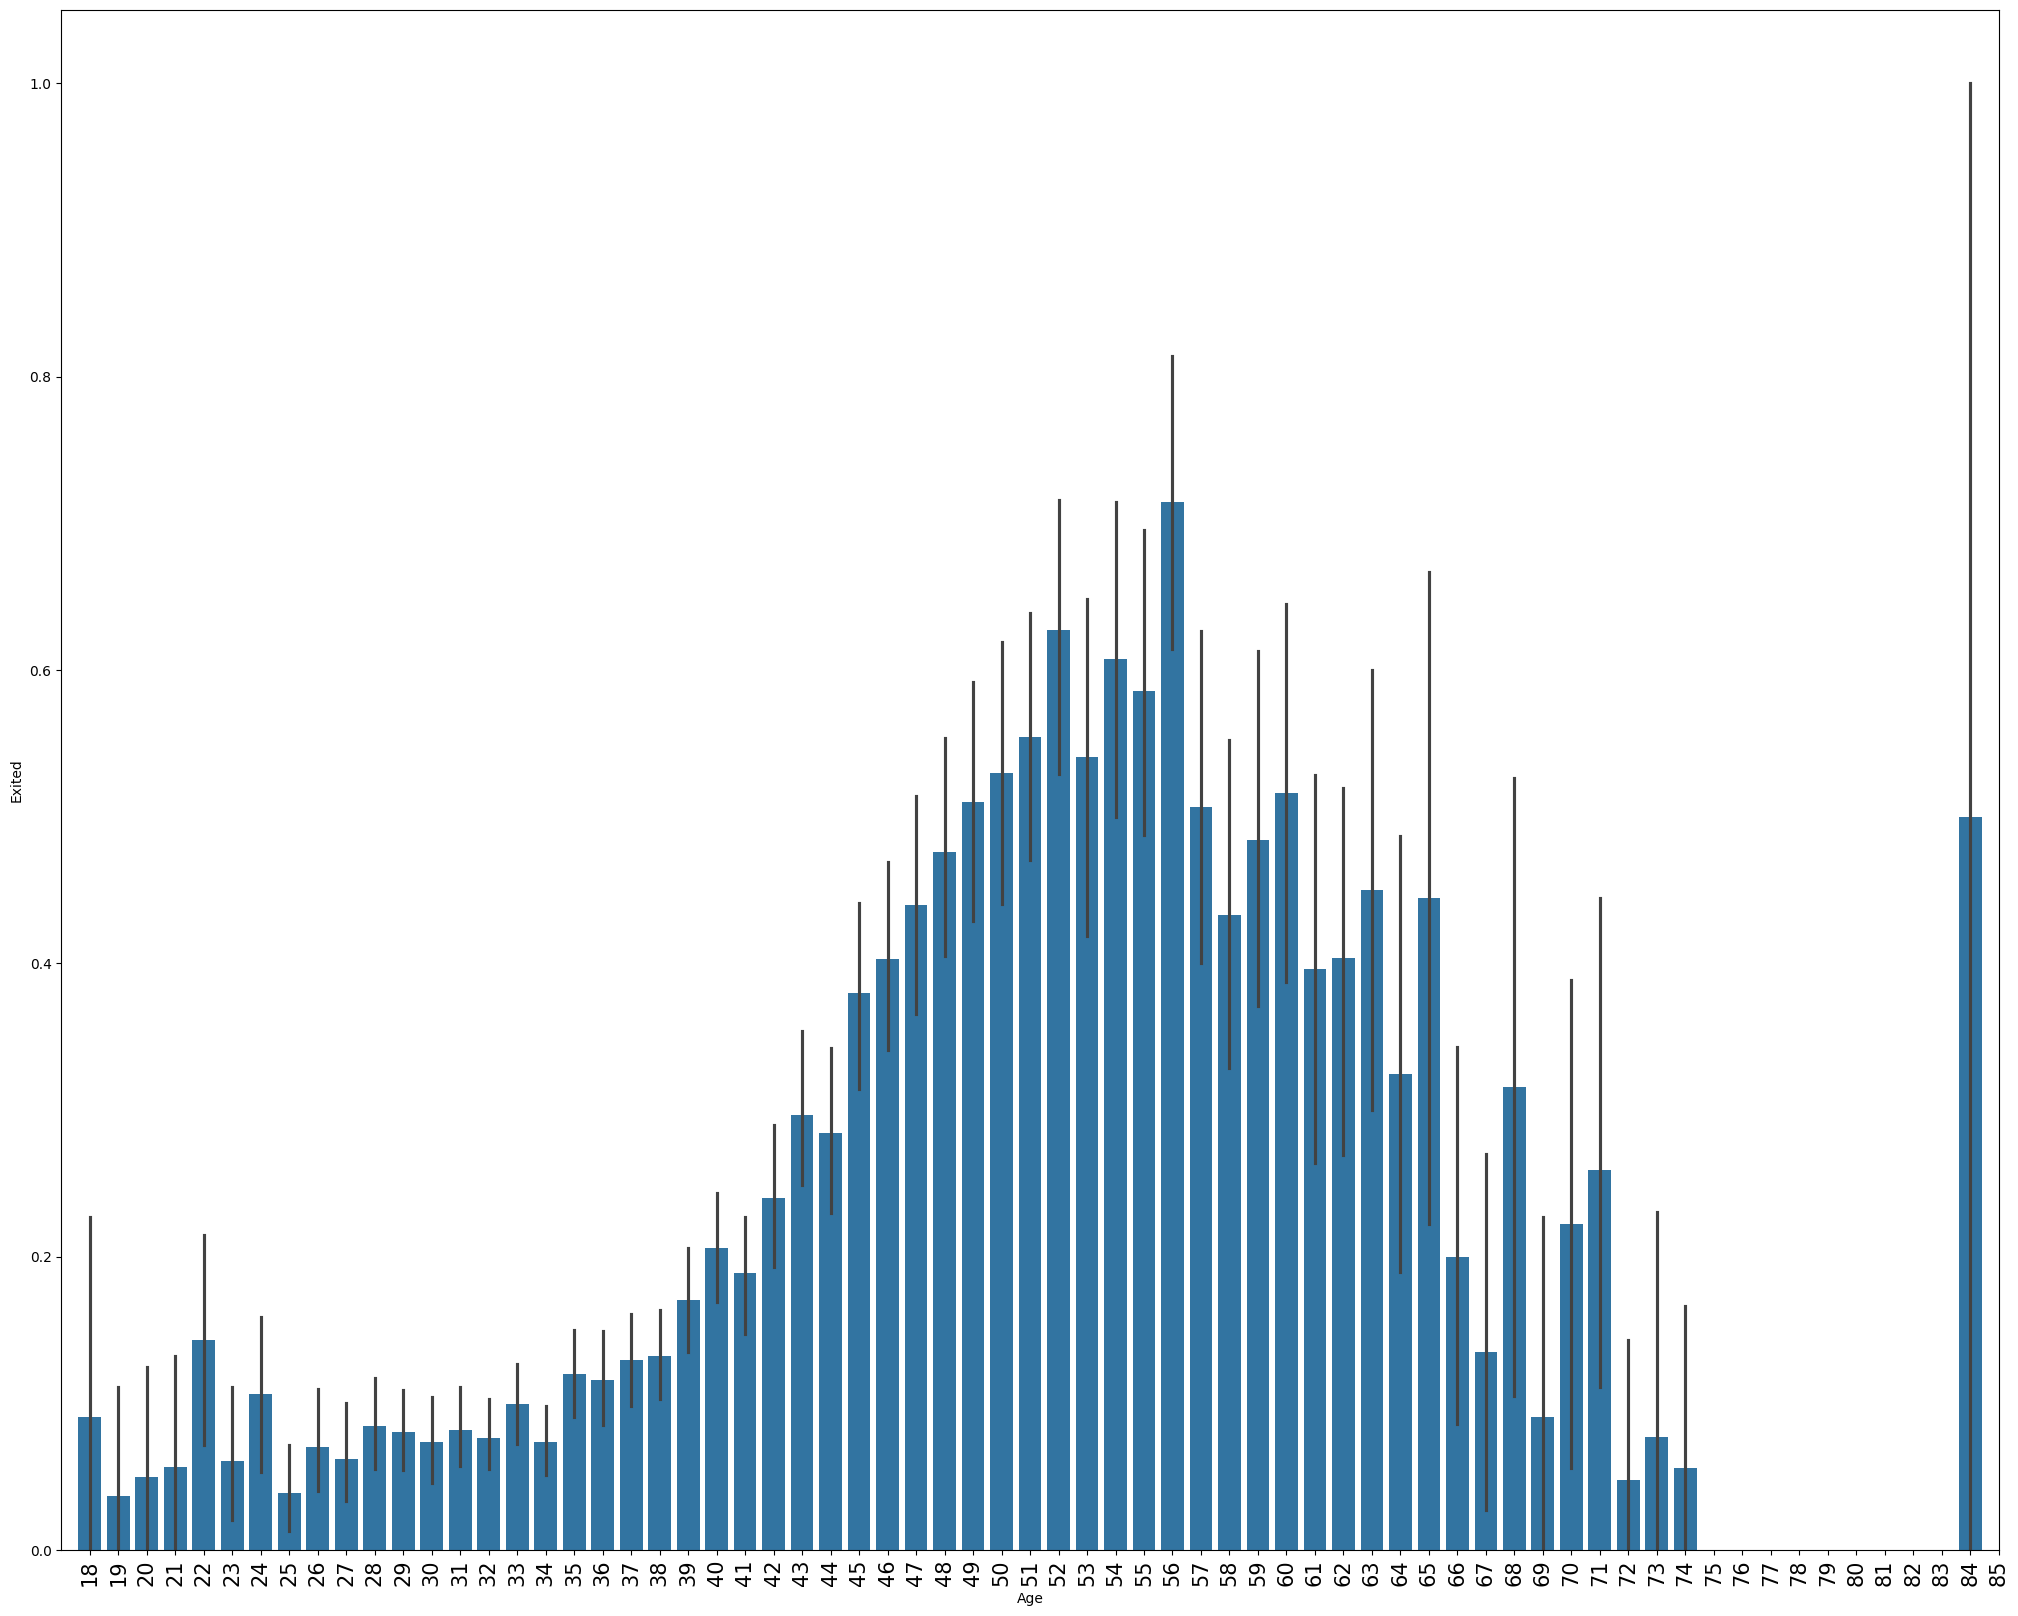

In [29]:
plt.figure(figsize=(25,20))
sns.barplot(x=df['Age'],y=df['Exited'])
plt.xticks(fontsize=15,rotation=90,)
plt.xlim(-1,67)
plt.plot

In [30]:
dfplot2=df[['EstimatedSalary','Balance','CreditScore','Age']]

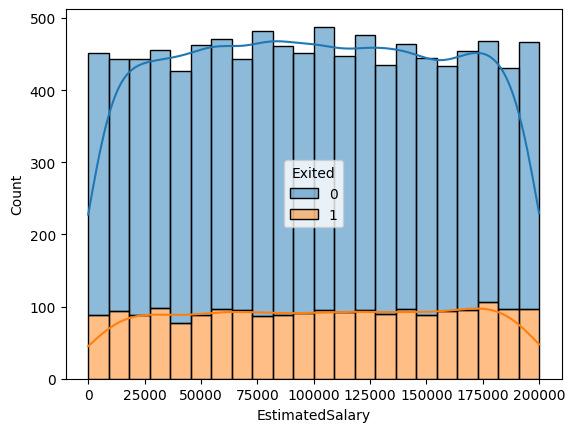

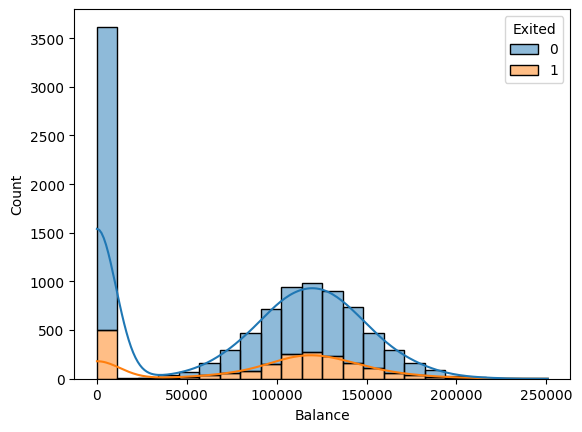

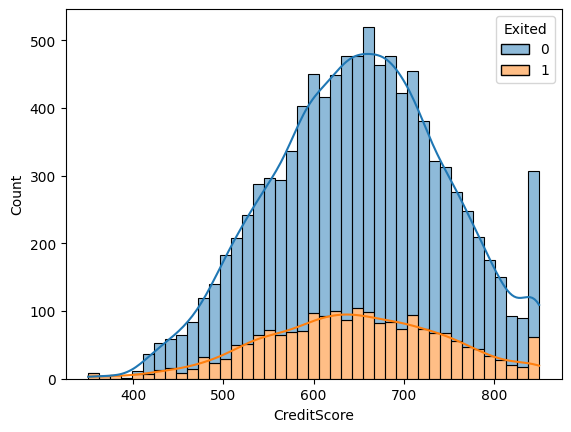

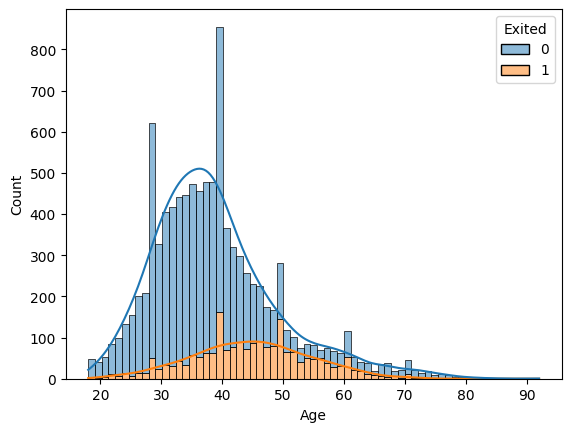

In [31]:
for i in dfplot2:
    plt.figure()
    sns.histplot(data=df,x=i,kde=True,hue=df['Exited'],multiple='stack')
    plt.plot()

<Axes: >

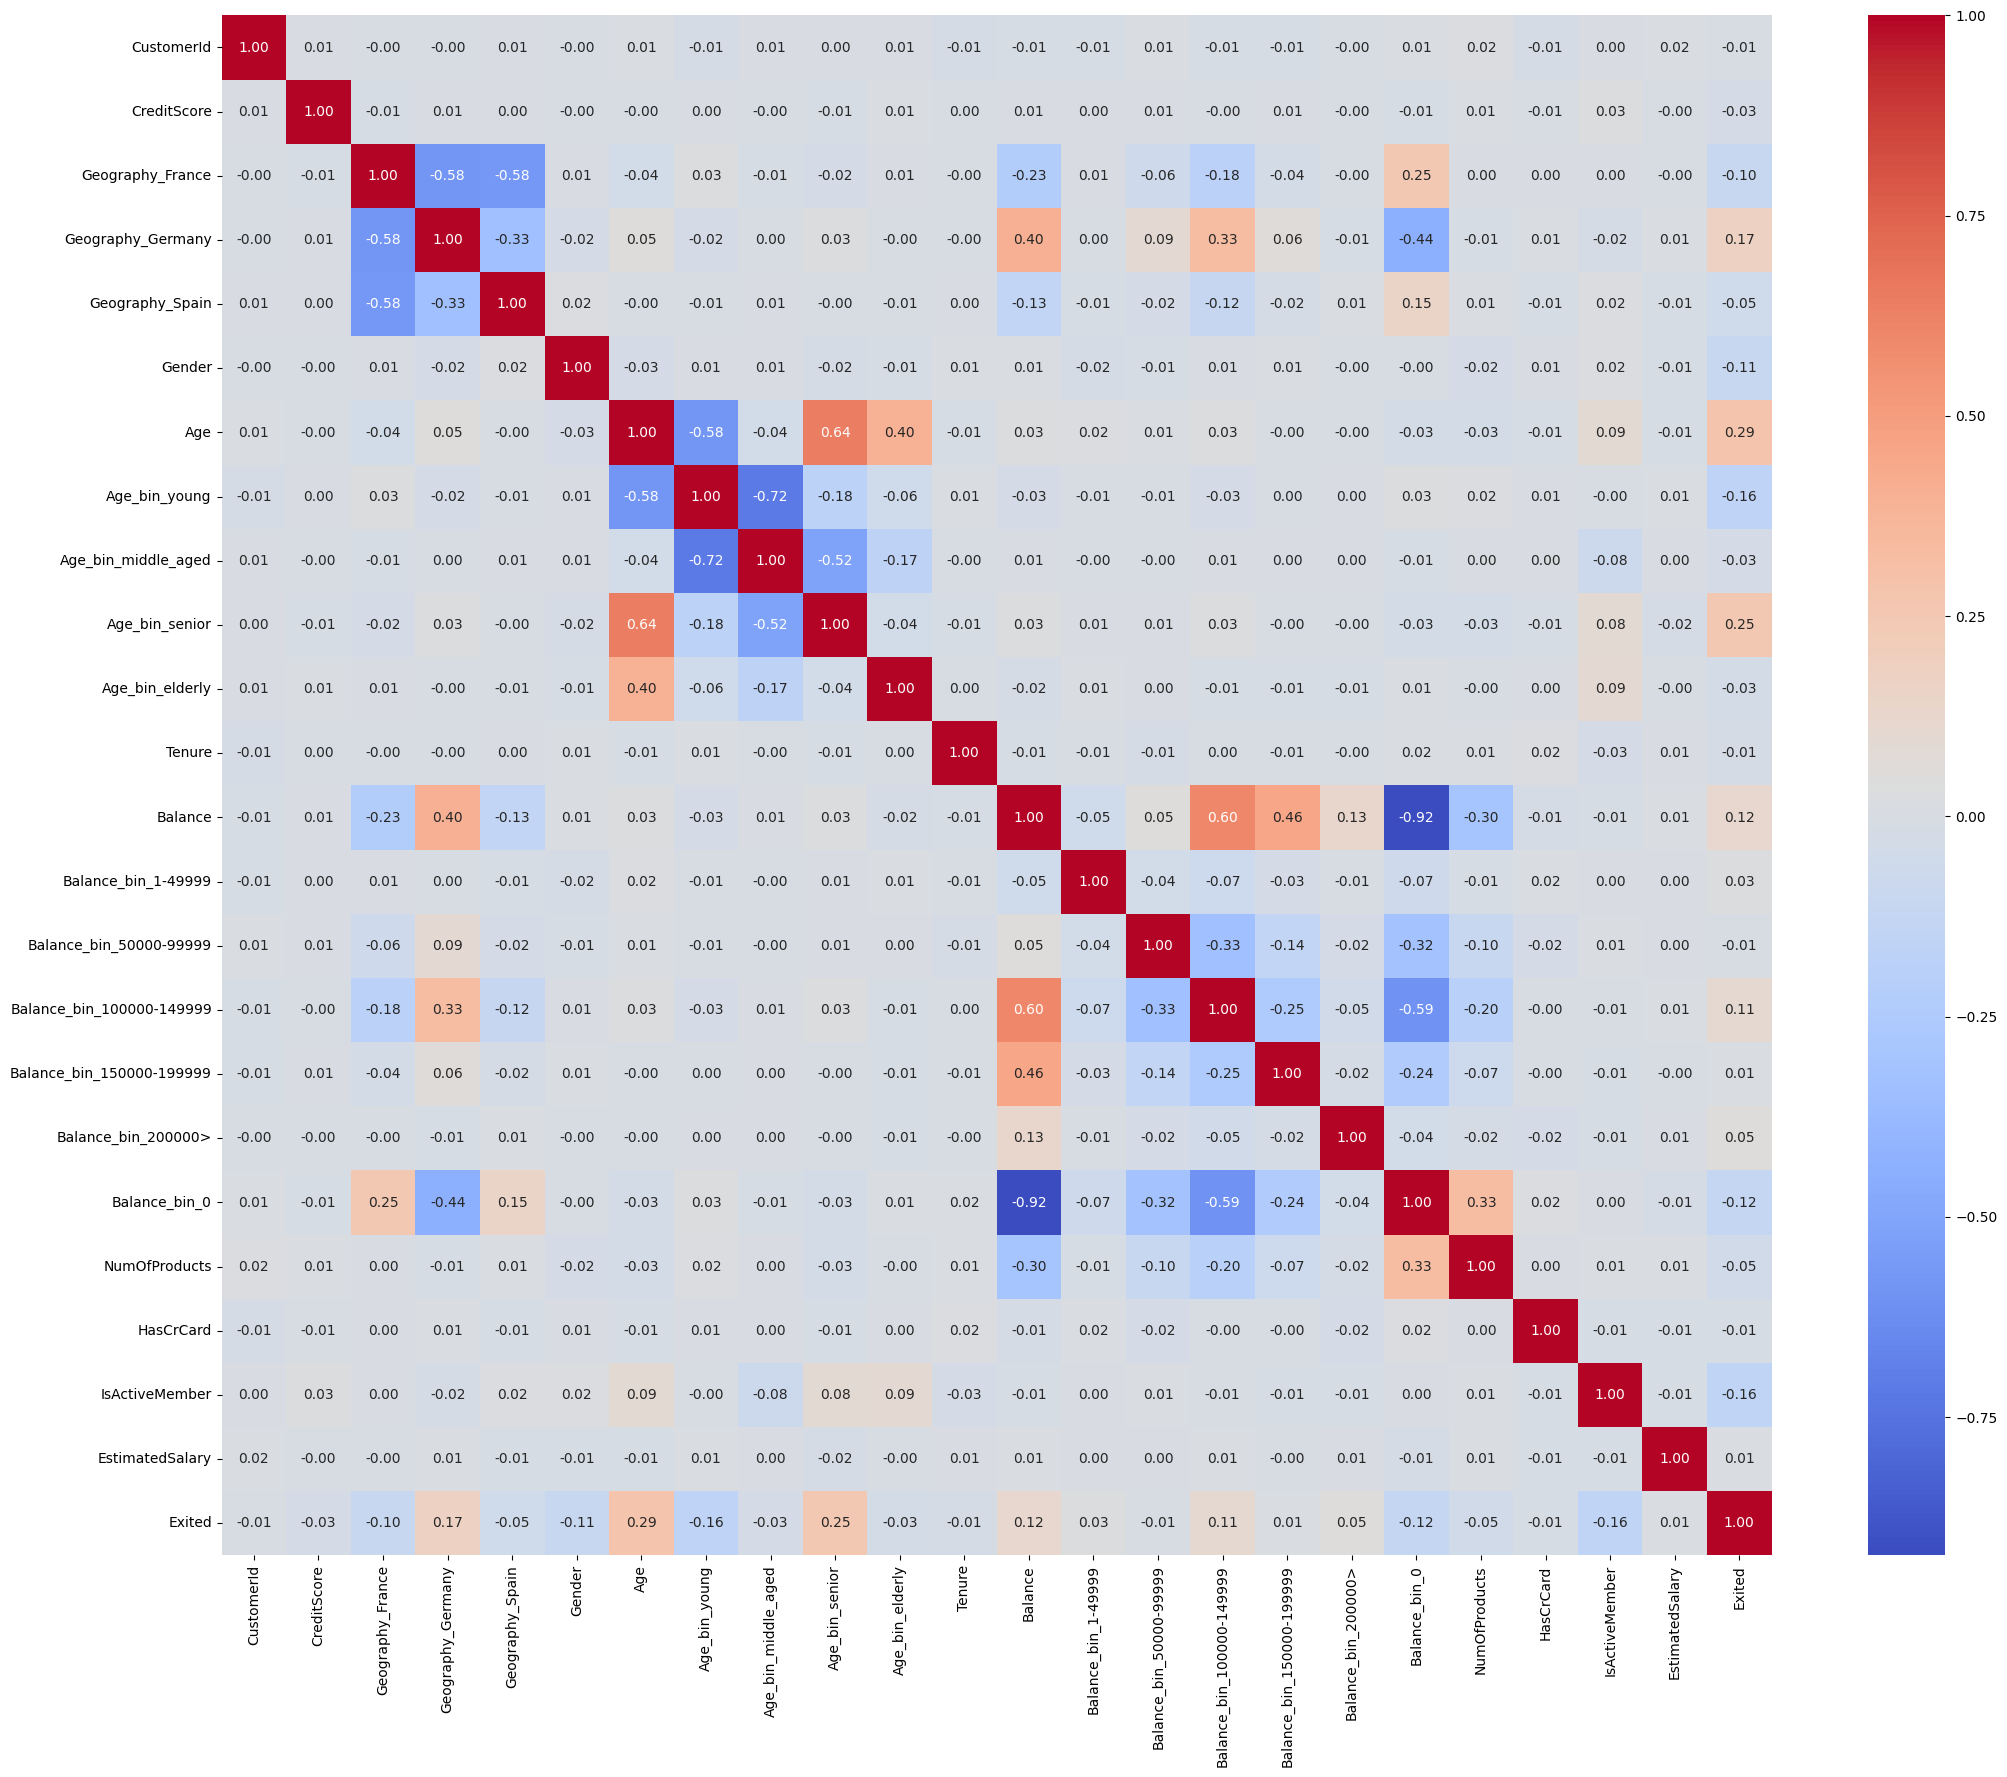

In [32]:
plt.figure(figsize=(25,20))
sns.heatmap(dfnumeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')

## Model training and evaluation

In [34]:
# Create a function for model evaluations
from sklearn import metrics

def evaluate(X_test, y_test, predict, prob, X, y, model):
    Accuracy = model.score(X_test, y_test)
    print(f'Accuracy: {Accuracy}')
    
    Precision = metrics.precision_score(y_test, predict,average='weighted')
    print(f'Precision: {Precision}')
    
    Sensitivity_recall = metrics.recall_score(y_test,predict,average='weighted')
    print(f'Sensitivity recall: {Sensitivity_recall}')
    
    F1_score = metrics.f1_score(y_test,predict,average='weighted')
    print(f'F1 score: {F1_score}')

    ROC_AUC_score=metrics.roc_auc_score(y_test,prob)
    print(f'ROC-AUC score: {ROC_AUC_score}')
    
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'Cross Validation Scores: {cv_scores}')

    return Accuracy,Precision,Sensitivity_recall,F1_score,ROC_AUC_score,cv_scores

In [35]:
# Create a function to plot Confusion Matrix
def conmat(y_test,predict):
    y_test = np.array(y_test) 
    predict = np.array(predict)
    
    confusion_matrix = metrics.confusion_matrix(y_test, predict)
    classes = np.unique(y_test)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                                display_labels=classes)
    cm_display.plot()
    plt.show()

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Extract the features from the DataFrame.
X = dfnumeric.drop('Exited', axis=1)

# Extract the target from the Dataframe.
y = dfnumeric['Exited']

# Split the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler() 

# Normalize the features.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE in case needed later.
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_train_resampled = pd.DataFrame(X_train_resampled,columns=X.columns)

### KNN

In [38]:
# Define the initial model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

# Define the parameter grid
param_grid={
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]
}

# Initialize GridSearchCV and fit with the train set
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
gridsearch.fit(X_train_scaled,y_train)
print("Best parameters found: ", gridsearch.best_params_)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best parameters found:  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


D:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [39]:
# Train the model
model=KNeighborsClassifier(**gridsearch.best_params_)
model.fit(X_train_scaled,y_train)

# Predict the test set.
predict=model.predict(X_test_scaled)
predict_proba=model.predict_proba(X_test_scaled)[:,1]

#### Evaluation for the KNN classifier

In [41]:
knn_accuracy, knn_precision, knn_sens, knn_f1,knn_roc_auc,_= evaluate(X_test_scaled, y_test, predict,predict_proba, X, y, model)

Accuracy: 0.835
Precision: 0.8165860993257844
Sensitivity recall: 0.835
F1 score: 0.8082182436701371
ROC-AUC score: 0.8174652561709188
Cross Validation Scores: [0.7855 0.787  0.7835 0.79   0.7905]


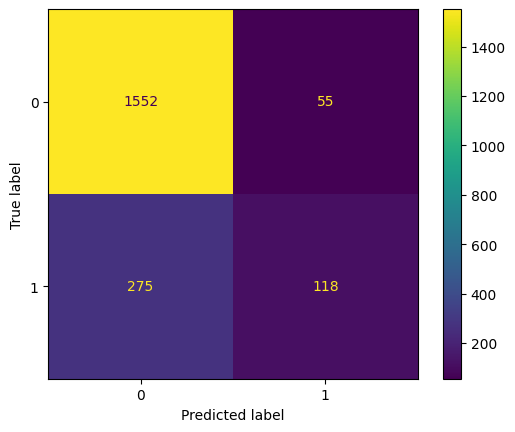

In [42]:
conmat(y_test,predict)

### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid and model
nb = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters found:", grid_search.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best parameters found: {'var_smoothing': 1e-09}


In [45]:
# Train the model with the best parameters and predict the output.
nb = GaussianNB(**grid_search.best_params_)
nb.fit(X_train_scaled,y_train)

# Predict the test set.  
predict=nb.predict(X_test_scaled)
predict_proba=nb.predict_proba(X_test_scaled)[:,1]

#### Evaluation for the Naive Bayes classifier

In [47]:
nb_accuracy, nb_precision, nb_sens, nb_f1,nb_roc_auc,_ = evaluate(X_test_scaled,y_test,predict,predict_proba,X,y,nb)

Accuracy: 0.817
Precision: 0.8149130307908546
Sensitivity recall: 0.817
F1 score: 0.8159217549272626
ROC-AUC score: 0.7730317899900404
Cross Validation Scores: [0.7865 0.7825 0.7895 0.788  0.783 ]


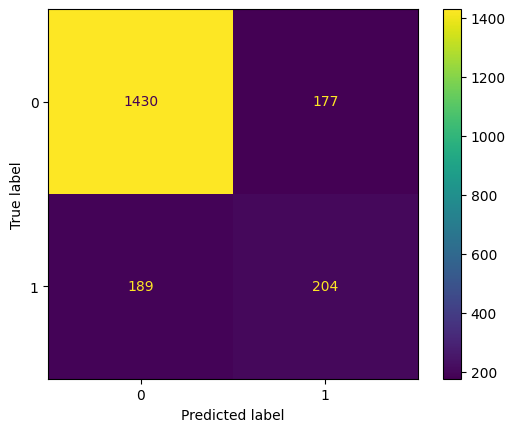

In [48]:
conmat(y_test,predict)

### SVM

In [50]:
# Initialize SVM
from sklearn.svm import SVC
svm=SVC(random_state=42)

# Introduce the parameter grid.
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced',None]
}

# Apply GridSearchCV
gridsearch = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose=2)
gridsearch.fit(X_train_scaled, y_train)
print(gridsearch.best_params_)

# Fit the model with the best parameters.
svm=SVC(random_state=42,probability=True,**gridsearch.best_params_)
svm.fit(X_train_scaled,y_train)

# Predict the test set.
predict=svm.predict(X_test_scaled)
predict_proba=svm.predict_proba(X_test_scaled)[:,1]

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 1, 'class_weight': None, 'gamma': 'scale'}


#### Evaluation for the SVM classifier

In [52]:
svm_accuracy, svm_precision, svm_sens, svm_f1,svm_roc_auc,_ = evaluate(X_test_scaled,y_test,predict,predict_proba,X,y,svm)


Accuracy: 0.8555
Precision: 0.8449136807284161
Sensitivity recall: 0.8555
F1 score: 0.8366395937961922
ROC-AUC score: 0.8336112206298463
Cross Validation Scores: [0.796  0.796  0.7965 0.7965 0.7965]


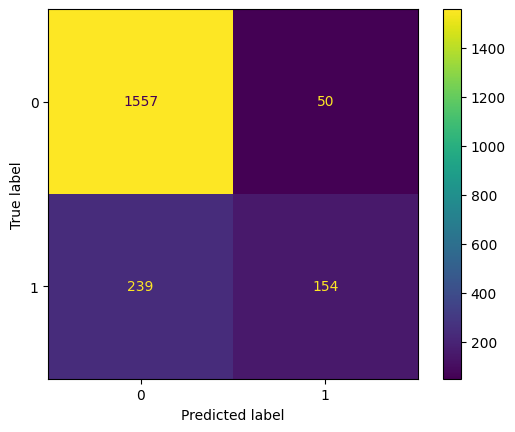

In [53]:
conmat(y_test,predict)

### Decision Tree

In [55]:
# Initalize the classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV by passing the parameter grid and defining decision tree estimator, cross validation, processing power and verbose
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train_scaled,y_train)
print(grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [56]:
# Fit and predict for Decision Tree
model=DecisionTreeClassifier(random_state=42,**grid_search.best_params_)
model.fit(X_train_scaled, y_train)

# Predict the test set.
predict=model.predict(X_test_scaled)
predict_proba=model.predict_proba(X_test_scaled)[:,1]

#### Evaluation for the Decision Tree classifier

In [58]:
dt_accuracy, dt_precision, dt_sens, dt_f1,dt_roc_auc,_ = evaluate(X_test_scaled,y_test,predict,predict_proba,X,y,model)


Accuracy: 0.8445
Precision: 0.8319432093577367
Sensitivity recall: 0.8445
F1 score: 0.8347528345304726
ROC-AUC score: 0.7900605018438732
Cross Validation Scores: [0.8315 0.8555 0.831  0.8535 0.838 ]


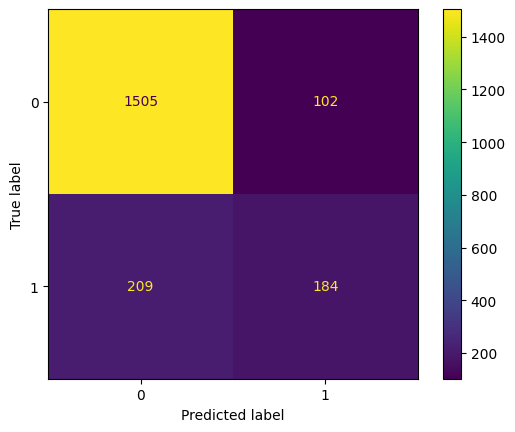

In [59]:
conmat(y_test,predict)

## Comparison of models' evaluations.

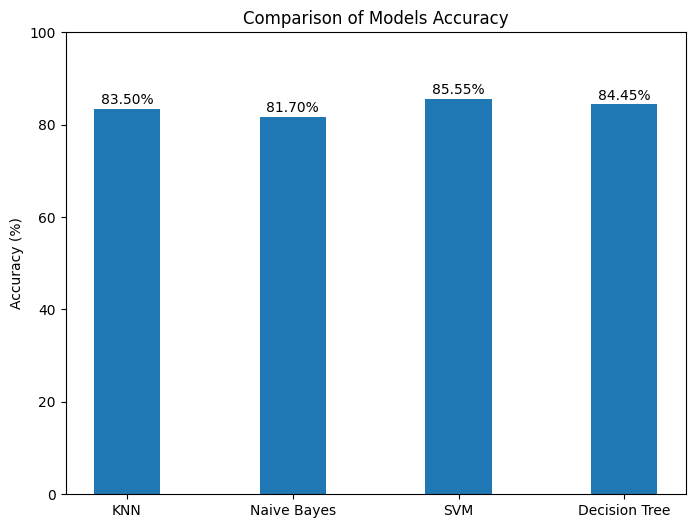

In [61]:
# Visualize the variance between each models' Accuracy.


plt.figure(figsize=(8,6))

models=['KNN','Naive Bayes','SVM','Decision Tree']
accuracies = [knn_accuracy*100,nb_accuracy*100,svm_accuracy*100,dt_accuracy*100]

plt.bar(models, accuracies,width=0.4)
plt.gca().set_ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Models Accuracy')
for i, value in enumerate(accuracies):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
    
plt.show()

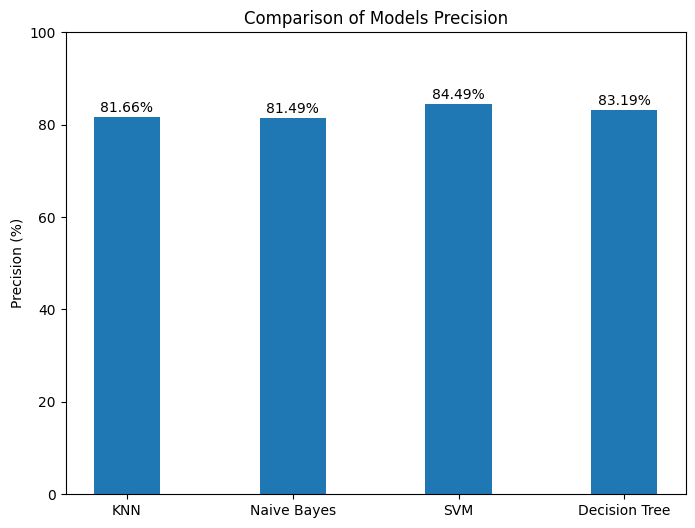

In [62]:
# Visualize the variance between each models' Precision.

plt.figure(figsize=(8,6))

models=['KNN','Naive Bayes','SVM','Decision Tree']
precisions = [knn_precision*100,nb_precision*100,svm_precision*100,dt_precision*100]

plt.bar(models, precisions,width=0.4)
plt.gca().set_ylim(0, 100)
plt.ylabel('Precision (%)')
plt.title('Comparison of Models Precision')
for i, value in enumerate(precisions):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
    
plt.show()

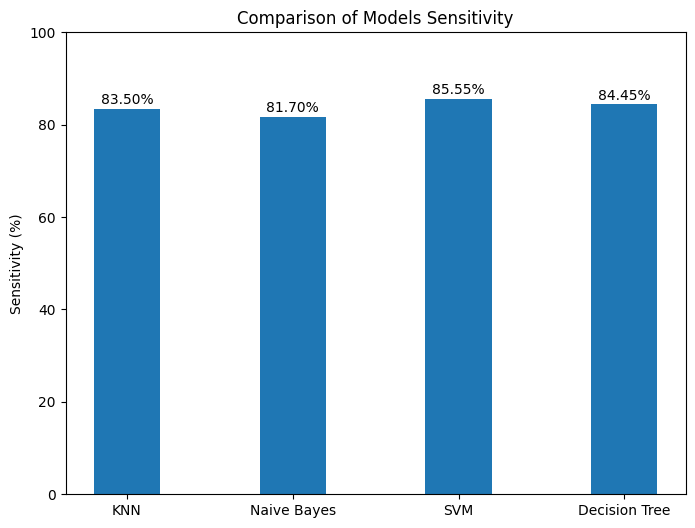

In [63]:
# Visualize the variance between each models' Sensitivity recall.

plt.figure(figsize=(8,6))

models=['KNN','Naive Bayes','SVM','Decision Tree']
sens = [knn_sens*100,nb_sens*100,svm_sens*100,dt_sens*100]

plt.bar(models, sens,width=0.4)
plt.gca().set_ylim(0, 100)
plt.ylabel('Sensitivity (%)')
plt.title('Comparison of Models Sensitivity')
for i, value in enumerate(sens):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
    
plt.show()

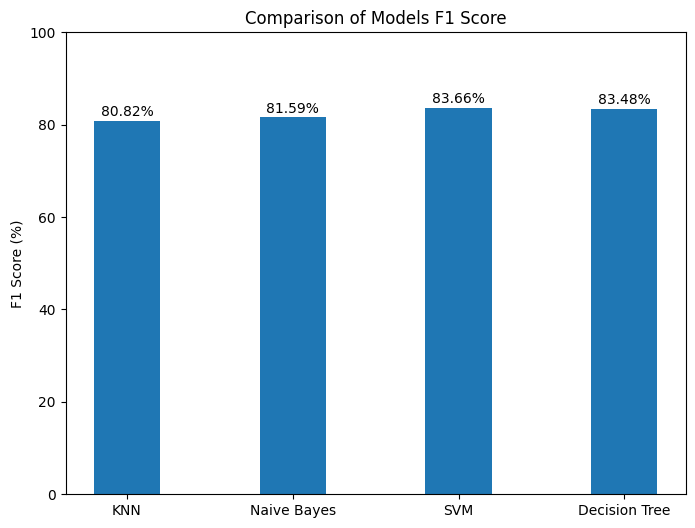

In [64]:
# Visualize the variance between each models' F1 Score.

plt.figure(figsize=(8,6))

models=['KNN','Naive Bayes','SVM','Decision Tree']
f1 = [knn_f1*100,nb_f1*100,svm_f1*100,dt_f1*100]

plt.bar(models, f1,width=0.4)
plt.gca().set_ylim(0, 100)
plt.ylabel('F1 Score (%)')
plt.title('Comparison of Models F1 Score')
for i, value in enumerate(f1):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
    
plt.show()

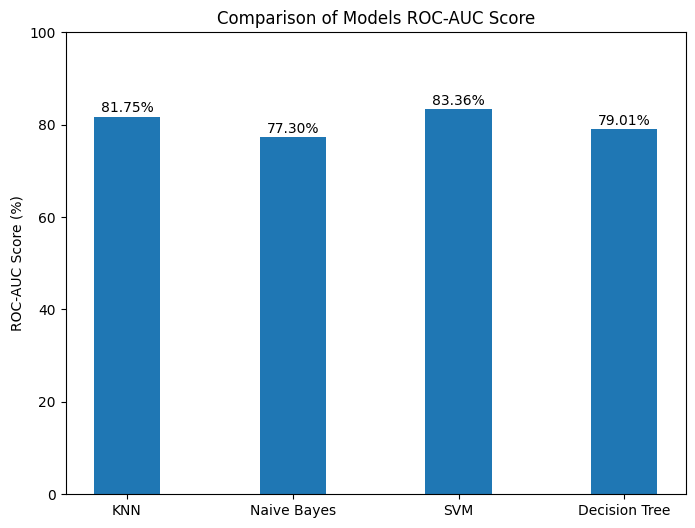

In [65]:
# Visualize the variance between each models' ROC-AUC Score.

plt.figure(figsize=(8,6))

models=['KNN','Naive Bayes','SVM','Decision Tree']
roc_auc = [knn_roc_auc*100,nb_roc_auc*100,svm_roc_auc*100,dt_roc_auc*100]

plt.bar(models, roc_auc,width=0.4)
plt.gca().set_ylim(0, 100)
plt.ylabel('ROC-AUC Score (%)')
plt.title('Comparison of Models ROC-AUC Score')
for i, value in enumerate(roc_auc):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')
    
plt.show()